# 911 Calls Capstone Project

***Importing various libraries and setting %matplotlib inline***

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***Reading csv file and storing it as a dataframe called df***

In [4]:
df = pd.read_csv('911.csv')

***Checking info() and head() off the dataframe(df)***

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


***Top 5 zipcodes for 911 calls***

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

***Top 5 townships for 911 calls***

In [9]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**No. of unique titles in dataframe**

In [10]:
df['title'].nunique()

110

**Obtaining the'reason' of the call from the title column(this field contains ['reason']:['deparment'] as values**

*For example, for a title value of EMS:BACK PAINS/INJURY, the reason would be EMS

In [11]:
df['Reason'] = df['title'].apply(lambda x: x[:x.index(':')])

**Ranking the reasons in level of calls**

In [12]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

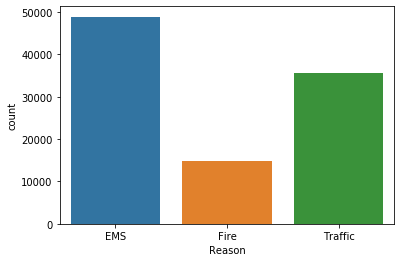

In [14]:
sns.countplot(x='Reason',data=df)
plt.show()

**Converting the 'timeStamp' field from a string based values to DateTime objects**

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

*Using the newly updated 'timeStamp', I'm creating three additional fields listing the  hours, months, and days of the week of all the records

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek).map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,Thur


*Using seaborn to create a countplot depicting the total calls received for the days in the week based on the reason for the call

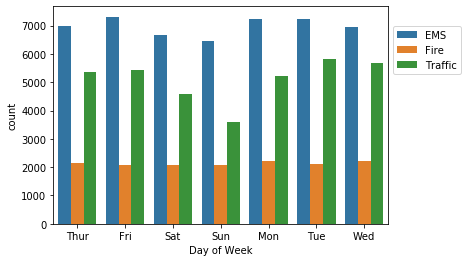

In [21]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(loc='center left',bbox_to_anchor=(1.0,.8))
plt.show()

*Doing the same, but this time focusing on calls received in a month opposed to days in the week

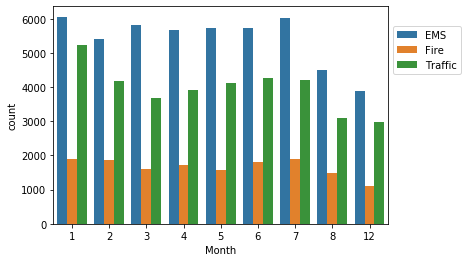

In [24]:
sns.countplot(x='Month', data=df, hue= 'Reason')
plt.legend(loc='center left', bbox_to_anchor=(1,.8))
plt.show()

*The data does not have any records for Septembre through November. Therefore, it would be better to showcase the above data a line plot

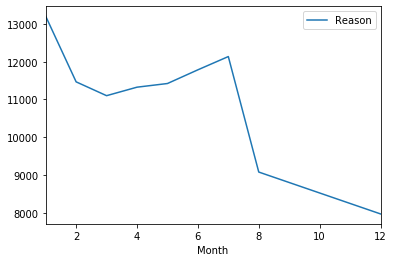

In [26]:
df.groupby('Month').count().plot(y='Reason')
plt.show()

*Using seaborn's lmplot() to create a line of "best fit" of our monthly data depicted above

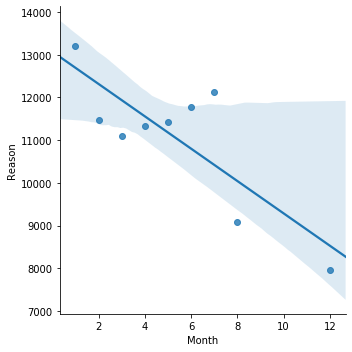

In [36]:
sns.lmplot(x='Month',y='Reason',data=df.groupby('Month').count().reset_index())
plt.show()

**Creating a new columns storing the date off of our existing timeStamp column**

In [37]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

*Using pandas to create a line plot of all types of 911 calls received by date

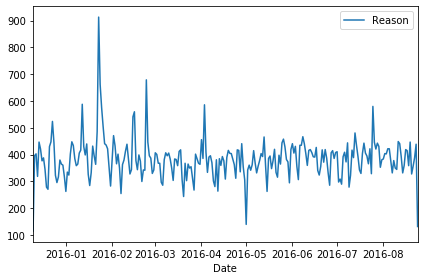

In [39]:
df.groupby('Date').count().plot(y='Reason')
plt.tight_layout()

*Doing the same as above but for the three respective type of calls(i.e. Traffic, Fire, EMS)

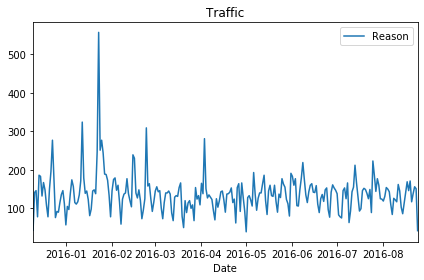

In [42]:
df[df['Reason']=='Traffic'].groupby('Date').count().plot(y='Reason')
plt.title('Traffic')
plt.tight_layout()

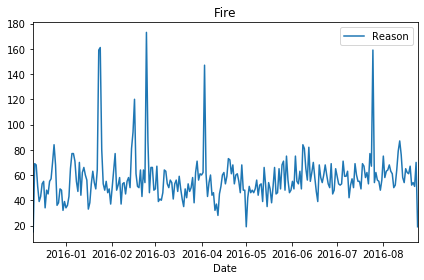

In [43]:
df[df['Reason']=='Fire'].groupby('Date').count().plot(y='Reason')
plt.title('Fire')
plt.tight_layout()

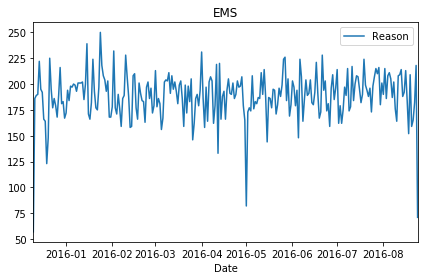

In [45]:
df[df['Reason']=='EMS'].groupby('Date').count().plot(y='Reason')
plt.title('EMS')
plt.tight_layout()

***Creating heatmaps and clustermaps off of our dataframe***

*Restructuring data via panda's pivot-table to matrix form in order to be able to map out data     

In [47]:
df1 = df.pivot_table(values='e',index = ['Day of Week'],columns = ['Hour'],aggfunc='sum').head()
df1

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


*Creating heatmap of data

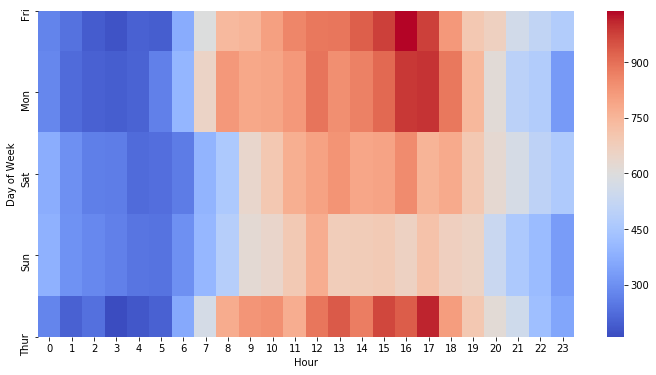

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(df1, cmap='coolwarm')
plt.show()

*Creating clustermap of data

<Figure size 864x432 with 0 Axes>

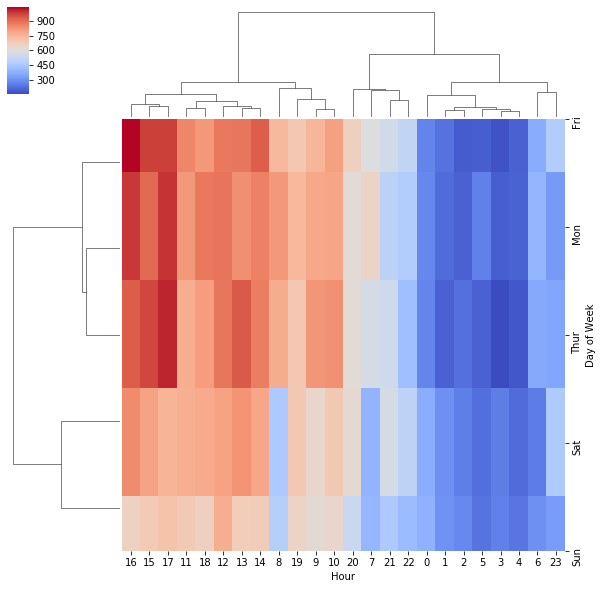

In [51]:
plt.figure(figsize=(12,6))
sns.clustermap(df1, cmap='coolwarm')
plt.show()